# **Exercise** **1**

In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
from IPython.display import display

df = pd.read_csv('ex1.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(30)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,137007,2016-07-23,Utah,Draper,12300 South,0,1,4.0,NaN,NaN,...,Man wanted for prior agg asault shot self in h...,0::30,0::Adult 18+,0::Male,0::Eddie Heuser,NaN,0::Injured,0::Subject-Suspect,51.0,11.0
1,49807,2014-12-13,-1,Chicago,10400 block of South State Street,-1,0,2.0,0::Unknown,0::Unknown,...,"Man shot, drive-by;",0::26,0::Adult 18+,0::Male,0::Tyrece L. Stornes,NaN,0::Killed,0::Victim,28.0,14.0
2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,NaN,NaN,...,NaN,0::28||1::3||2::1||3::38,0::Adult 18+||1::Child 0-11||2::Child 0-11||3:...,0::Female||1::Male||2::Female||3::Male,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,73.0,19.0
3,237635,2018-03-18,-1,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,NaN,0::Unknown,0::Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,238068,2018-03-21,Michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,0::Handgun,...,"raid, drug, stolen handgun",0::34||1::39||2::31||3::47,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Sylvester Davis III||1::Leonard Robinson||2...,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,79.0,21.0
5,109261,2016-01-25,Georgia,Athens,Hemlock Drive and Hemlock Way,0,0,9.0,0::Unknown,0::Handgun,...,"gave ride to somewhat familiar perp, cj and ro...",0::26,0::Adult 18+,0::Male||1::Male,NaN,NaN,0::Unharmed||1::Unharmed,0::Victim||1::Subject-Suspect,118.0,47.0
6,20880,2014-06-09,Maryland,Baltimore,NaN,0,1,7.0,NaN,NaN,...,NaN,NaN,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,40.0,40.0
7,142538,2016-08-23,Florida,Fort Pierce,2900 block of Avenue D,1,0,18.0,0::Unknown,0::9mm,...,"result of argument between 2 apt buildings, 9m...",0::34||1::25,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jonathan Maciel||1::Ashlyn Salomon,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,84.0,32.0
8,66393,2015-04-19,-1,Sandy,161 W. Eastgate Dr,0,-1,4.0,NaN,NaN,...,Road rage incident; dispute on I-15. Perp foll...,0::36,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||4::Male,NaN,NaN,0::Injured||1::Unharmed||2::Unharmed||3::Unhar...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,44.0,8.0
9,129221,2016-06-04,-1,Roanoke,1200 block of Greenhurst Avenue Northwest,0,1,6.0,NaN,NaN,...,"northwest Roanoke at Oakland Boulevard, man fo...",0::25,0::Adult 18+,0::Male,0::Michael Orlanda Rudisell II,NaN,0::Injured,0::Victim,11.0,21.0


# **Question 1**


## **a.**
**Oridinal features -**
 Incident id, date, participant_age_group.


**Categorical features -**
 state, city_or_county, address, congressional_district, gun_type, incident_characteristics, location_description, notes, participant_gender, participant_name, participant_relationship, participant_status, participant_type, state_house_district, state_senate_district.


**Continius features -**
 n_killed, n_injured, gun_stolen, latitude,	longitude, n_guns_involved, participant_age.

## b.

There are null values.

Columns with null values:

address,
n_injured,
congressional_district,
gun_stolen,
gun_type,
incident_characteristics,
latitude,
location_description,
longitude,
n_guns_involved,
notes,
participant_age,
participant_age_group,
participant_gender,
participant_name,
participant_relationship,
participant_status,
participant_type,
state_house_district,
state_senate_district.

In [320]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for col in null_columns:
    null_count = df[col].isnull().sum()
    print(f"{col}: {null_count} null values")

Columns with null values:
address: 1013 null values
congressional_district: 715 null values
gun_stolen: 6040 null values
gun_type: 6038 null values
incident_characteristics: 17 null values
latitude: 373 null values
location_description: 12187 null values
longitude: 469 null values
n_guns_involved: 6038 null values
notes: 4917 null values
participant_age: 5633 null values
participant_age_group: 2544 null values
participant_gender: 2164 null values
participant_name: 7540 null values
participant_relationship: 13735 null values
participant_status: 1656 null values
participant_type: 1482 null values
state_house_district: 2428 null values
state_senate_district: 2030 null values


Replacing the null values with the most common column value:

In [321]:
for col in df:
    df[col].fillna(df[col].mode()[0], inplace=True)

Here we can see that there are no columns with null values anymore.

In [322]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for col in null_columns:
    null_count = df[col].isnull().sum()
    print(f"{col}: {null_count} null values")

Columns with null values:


## c.
3 general types of data inaccuracies:


1.

 Negative numbers in columns that need to have only positive numbers- In the colum n_killed and n_injured there are -1 values.

2.  
 Number -1 in categorical column - 'state' which not suppose to
 contains numbers.

 String values in integers columns.
 In the column 'latitude' not all values are integers, there is a string "its pretty far there, man" in some rows.

3.    In the longitiude and latitude columns there are unvalid values,

  vlaues that not in the valid range (-180 to 180 for longitude and -90 to 90 for latitude).

Fixing those problems:

This cell responsibole of replacing the negative numbers in the columns : 'n_killed' and 'n_injured' with their absolute values.

In [323]:
def replace_negatives_with_absolute(col_name):
    df[col_name] = df[col_name].apply(lambda x: abs(x))


replace_negatives_with_absolute('n_killed')
replace_negatives_with_absolute('n_injured')
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,137007,2016-07-23,Utah,Draper,12300 South,0,1,4.0,0::Unknown,0::Unknown,...,Man wanted for prior agg asault shot self in h...,0::30,0::Adult 18+,0::Male,0::Eddie Heuser,1::Significant others - current or former,0::Injured,0::Subject-Suspect,51.0,11.0
1,49807,2014-12-13,-1,Chicago,10400 block of South State Street,1,0,2.0,0::Unknown,0::Unknown,...,"Man shot, drive-by;",0::26,0::Adult 18+,0::Male,0::Tyrece L. Stornes,1::Significant others - current or former,0::Killed,0::Victim,28.0,14.0
2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,0::Unknown,0::Unknown,...,man shot,0::28||1::3||2::1||3::38,0::Adult 18+||1::Child 0-11||2::Child 0-11||3:...,0::Female||1::Male||2::Female||3::Male,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,73.0,19.0
3,237635,2018-03-18,-1,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,1.0,0::Unknown,0::Unknown,...,man shot,0::18,0::Adult 18+,0::Male,0::Officer,1::Significant others - current or former,0::Injured,0::Victim,10.0,5.0
4,238068,2018-03-21,Michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,0::Handgun,...,"raid, drug, stolen handgun",0::34||1::39||2::31||3::47,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Sylvester Davis III||1::Leonard Robinson||2...,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,79.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14746,186845,2017-05-12,Texas,Midland,2700 FM 1379,0,0,11.0,0::Stolen,0::Handgun,...,"8th graders with stolen pistol, ammo in locker...",0::14||1::14,0::Teen 12-17||1::Teen 12-17,0::Male||1::Male,0::Officer,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested",0::Subject-Suspect||1::Subject-Suspect,10.0,31.0
14747,234988,2018-03-01,-1,Columbus,1500 block of Elaine Rd,1,0,3.0,0::Unknown,0::Unknown,...,shot in vehicle,0::22,0::Adult 18+,0::Male,0::Caleb Zev-Lewis Kekeh,1::Significant others - current or former,0::Killed,0::Victim,26.0,15.0
14748,202356,2017-08-07,Florida,Orlando (Pine Hills),5815 North Ln,1,0,10.0,0::Unknown,0::Unknown,...,11:30 PM,0::30||2::21||3::20,0::Adult 18+||2::Adult 18+||3::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Deangelo Henderson||1::Jordan Benjamin||2::...,1::Significant others - current or former,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...",0::Victim||1::Subject-Suspect||2::Subject-Susp...,45.0,11.0
14749,2322,2014-01-15,-1,Baton Rouge,3400 E Sky Harbor Blvd,0,0,6.0,0::Unknown,0::Unknown,...,16 year old teenage female brought a gun to sc...,0::16,0::Teen 12-17,0::Female||1::Male||2::Male,1::Cody East||2::Compton East,1::Significant others - current or former,0::Unharmed||1::Unharmed||2::Unharmed,0::Subject-Suspect||1::Subject-Suspect||2::Sub...,67.0,14.0


This cell responsibole for fixing the problems in the columns:
 'latitude' and 'longitude' -

Change the values to be valid -

*   latitude to be a number between -90 to 90
*   longitude to be a number between -180 to 180
    
  By changing the value to be the mean of the valid values of latitude/longtitude in the state.

In [324]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df_filtered_valid_lat = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]
mean_latitude_df = df_filtered_valid_lat.groupby('state')['latitude'].mean().reset_index()
mean_latitude_df.columns = ['state', 'latitude_mean']

df= pd.merge(df, mean_latitude_df, on='state', how='left')
df.loc[df['latitude'].isna(), 'latitude'] = df['latitude_mean']


df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df_filtered_valid_lon = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]
mean_longitude_df = df_filtered_valid_lon.groupby('state')['longitude'].mean().reset_index()
mean_longitude_df.columns = ['state', 'longitude_mean']

df= pd.merge(df, mean_longitude_df, on='state', how='left')
df.loc[(df['longitude'] < -180) | (df['longitude'] > 180), 'longitude'] = df['longitude_mean']

df.drop('latitude_mean', axis=1, inplace=True)
df.drop('longitude_mean', axis=1, inplace=True)
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,137007,2016-07-23,Utah,Draper,12300 South,0,1,4.0,0::Unknown,0::Unknown,...,Man wanted for prior agg asault shot self in h...,0::30,0::Adult 18+,0::Male,0::Eddie Heuser,1::Significant others - current or former,0::Injured,0::Subject-Suspect,51.0,11.0
1,49807,2014-12-13,-1,Chicago,10400 block of South State Street,1,0,2.0,0::Unknown,0::Unknown,...,"Man shot, drive-by;",0::26,0::Adult 18+,0::Male,0::Tyrece L. Stornes,1::Significant others - current or former,0::Killed,0::Victim,28.0,14.0
2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,0::Unknown,0::Unknown,...,man shot,0::28||1::3||2::1||3::38,0::Adult 18+||1::Child 0-11||2::Child 0-11||3:...,0::Female||1::Male||2::Female||3::Male,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,73.0,19.0
3,237635,2018-03-18,-1,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,1.0,0::Unknown,0::Unknown,...,man shot,0::18,0::Adult 18+,0::Male,0::Officer,1::Significant others - current or former,0::Injured,0::Victim,10.0,5.0
4,238068,2018-03-21,Michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,0::Handgun,...,"raid, drug, stolen handgun",0::34||1::39||2::31||3::47,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Sylvester Davis III||1::Leonard Robinson||2...,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,79.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14746,186845,2017-05-12,Texas,Midland,2700 FM 1379,0,0,11.0,0::Stolen,0::Handgun,...,"8th graders with stolen pistol, ammo in locker...",0::14||1::14,0::Teen 12-17||1::Teen 12-17,0::Male||1::Male,0::Officer,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested",0::Subject-Suspect||1::Subject-Suspect,10.0,31.0
14747,234988,2018-03-01,-1,Columbus,1500 block of Elaine Rd,1,0,3.0,0::Unknown,0::Unknown,...,shot in vehicle,0::22,0::Adult 18+,0::Male,0::Caleb Zev-Lewis Kekeh,1::Significant others - current or former,0::Killed,0::Victim,26.0,15.0
14748,202356,2017-08-07,Florida,Orlando (Pine Hills),5815 North Ln,1,0,10.0,0::Unknown,0::Unknown,...,11:30 PM,0::30||2::21||3::20,0::Adult 18+||2::Adult 18+||3::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Deangelo Henderson||1::Jordan Benjamin||2::...,1::Significant others - current or former,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...",0::Victim||1::Subject-Suspect||2::Subject-Susp...,45.0,11.0
14749,2322,2014-01-15,-1,Baton Rouge,3400 E Sky Harbor Blvd,0,0,6.0,0::Unknown,0::Unknown,...,16 year old teenage female brought a gun to sc...,0::16,0::Teen 12-17,0::Female||1::Male||2::Male,1::Cody East||2::Compton East,1::Significant others - current or former,0::Unharmed||1::Unharmed||2::Unharmed,0::Subject-Suspect||1::Subject-Suspect||2::Sub...,67.0,14.0


This cell responsibole of:

Replacing the -1 values in the state column to be the most common state.

(-1 are the onlu numbers in the column state).

In [325]:
def replace_numeric_with_most_common(column_name):
    non_numeric_values = df[column_name][~pd.to_numeric(df[column_name], errors='coerce').notna()]
    most_common_value = non_numeric_values.mode().iloc[0]
    df[column_name] = df[column_name].replace('-1',most_common_value)


replace_numeric_with_most_common('state')
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,137007,2016-07-23,Utah,Draper,12300 South,0,1,4.0,0::Unknown,0::Unknown,...,Man wanted for prior agg asault shot self in h...,0::30,0::Adult 18+,0::Male,0::Eddie Heuser,1::Significant others - current or former,0::Injured,0::Subject-Suspect,51.0,11.0
1,49807,2014-12-13,Illinois,Chicago,10400 block of South State Street,1,0,2.0,0::Unknown,0::Unknown,...,"Man shot, drive-by;",0::26,0::Adult 18+,0::Male,0::Tyrece L. Stornes,1::Significant others - current or former,0::Killed,0::Victim,28.0,14.0
2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,0::Unknown,0::Unknown,...,man shot,0::28||1::3||2::1||3::38,0::Adult 18+||1::Child 0-11||2::Child 0-11||3:...,0::Female||1::Male||2::Female||3::Male,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,73.0,19.0
3,237635,2018-03-18,Illinois,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,1.0,0::Unknown,0::Unknown,...,man shot,0::18,0::Adult 18+,0::Male,0::Officer,1::Significant others - current or former,0::Injured,0::Victim,10.0,5.0
4,238068,2018-03-21,Michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,0::Handgun,...,"raid, drug, stolen handgun",0::34||1::39||2::31||3::47,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Sylvester Davis III||1::Leonard Robinson||2...,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,79.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14746,186845,2017-05-12,Texas,Midland,2700 FM 1379,0,0,11.0,0::Stolen,0::Handgun,...,"8th graders with stolen pistol, ammo in locker...",0::14||1::14,0::Teen 12-17||1::Teen 12-17,0::Male||1::Male,0::Officer,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested",0::Subject-Suspect||1::Subject-Suspect,10.0,31.0
14747,234988,2018-03-01,Illinois,Columbus,1500 block of Elaine Rd,1,0,3.0,0::Unknown,0::Unknown,...,shot in vehicle,0::22,0::Adult 18+,0::Male,0::Caleb Zev-Lewis Kekeh,1::Significant others - current or former,0::Killed,0::Victim,26.0,15.0
14748,202356,2017-08-07,Florida,Orlando (Pine Hills),5815 North Ln,1,0,10.0,0::Unknown,0::Unknown,...,11:30 PM,0::30||2::21||3::20,0::Adult 18+||2::Adult 18+||3::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Deangelo Henderson||1::Jordan Benjamin||2::...,1::Significant others - current or former,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...",0::Victim||1::Subject-Suspect||2::Subject-Susp...,45.0,11.0
14749,2322,2014-01-15,Illinois,Baton Rouge,3400 E Sky Harbor Blvd,0,0,6.0,0::Unknown,0::Unknown,...,16 year old teenage female brought a gun to sc...,0::16,0::Teen 12-17,0::Female||1::Male||2::Male,1::Cody East||2::Compton East,1::Significant others - current or former,0::Unharmed||1::Unharmed||2::Unharmed,0::Subject-Suspect||1::Subject-Suspect||2::Sub...,67.0,14.0


# **Question 2**

## a.
We can see in the top graph that the amount of gun violence did increase over time.

In addition in the lower graph we can see that crimes become more severe over time.


I choose the feature n_injured to indicate the severity of the crime because crimes resulting in a larger number of injuries may suggest a more intentional, aggressive, or violent act, which can be indicative of a higher severity.


I choose to show the time in scale of 3 mounth because in 2018 - the latest year sampled the last date is in the end of the 3 mounth: 2018-03-31.

In [326]:
df['date'] = pd.to_datetime(df['date'])
latest_date = df['date'].max()

print("Latest Date:", latest_date)

Latest Date: 2018-03-31 00:00:00


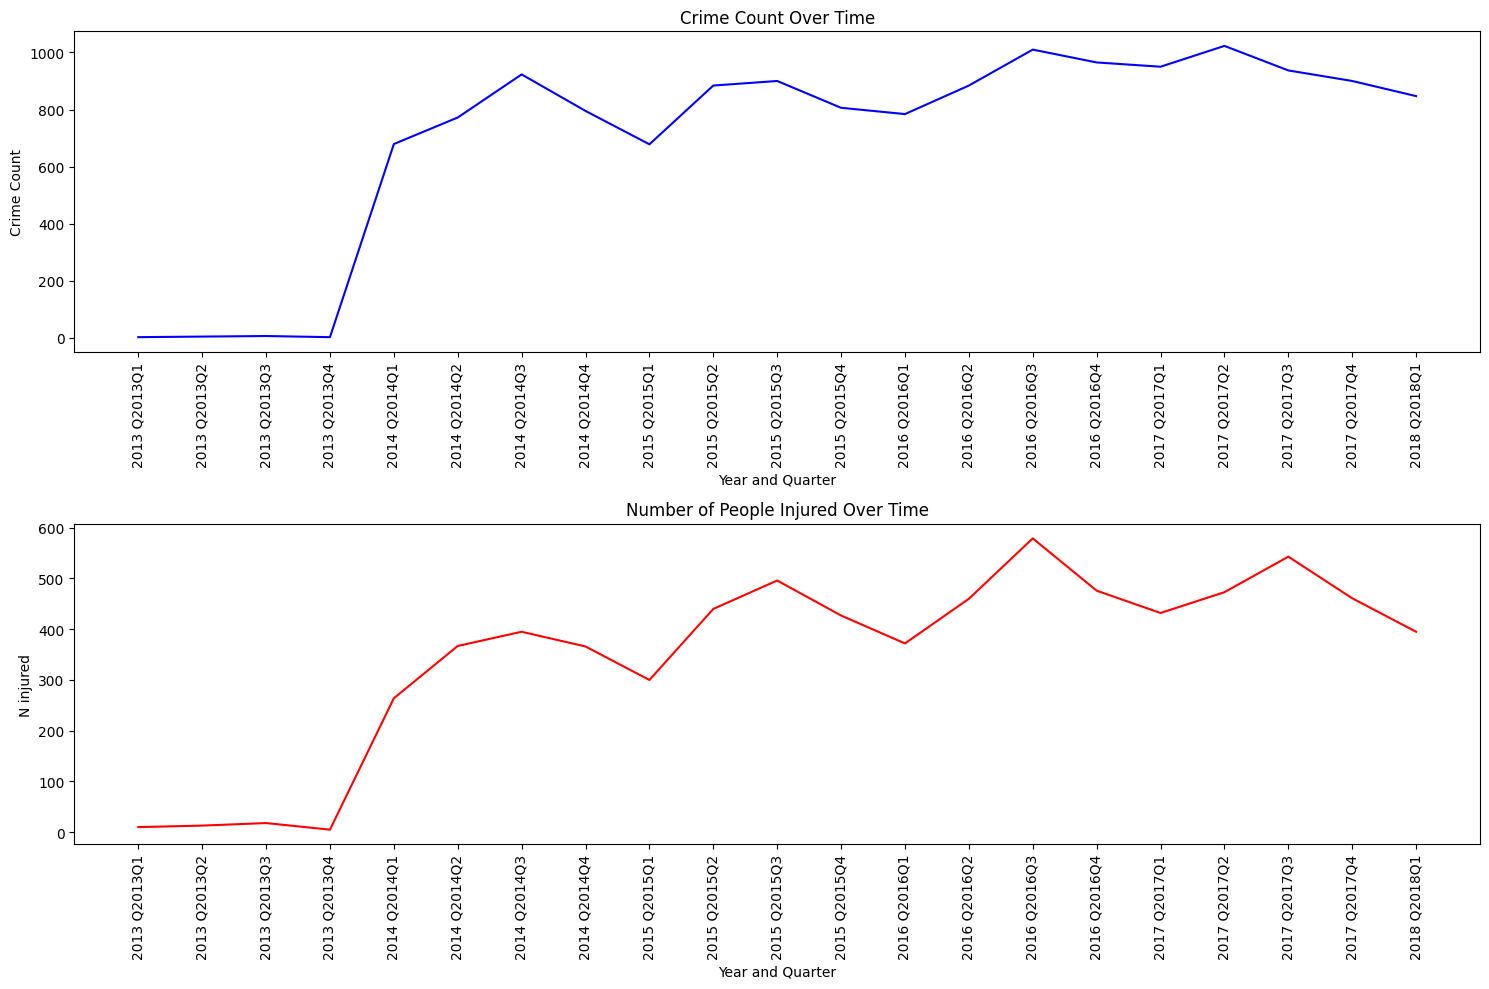

In [327]:
date_df = df.copy()
date_df['date'] = pd.to_datetime(date_df['date'])
date_df['year'] = date_df['date'].dt.year
date_df['q'] = date_df['date'].dt.to_period("Q")
date_counts = date_df.groupby(['year', 'q']).size().reset_index(name='count')
plt.figure(figsize=(15, 10))

#Crime Count
plt.subplot(2, 1, 1)
plt.plot(date_counts['count'], color='blue')
plt.xlabel('Year and Quarter')
plt.ylabel('Crime Count')
plt.title('Crime Count Over Time')
plt.xticks(range(len(date_counts)), [f"{year} Q{quarter}" for year, quarter in zip(date_counts['year'], date_counts['q'])], rotation='vertical')

#N Injured
plt.subplot(2, 1, 2)
plt.plot(date_df.groupby(['year', 'q'])['n_injured'].sum().reset_index(name='count')['count'], color='red')
plt.xlabel('Year and Quarter')
plt.ylabel('N injured')
plt.title('Number of People Injured Over Time')
plt.xticks(range(len(date_counts)), [f"{year} Q{quarter}" for year, quarter in zip(date_counts['year'], date_counts['q'])], rotation='vertical')

plt.tight_layout()
plt.show()

## .b
There are more dangerous areas where crimes are more prevalent.

We can see it in the first plot - there are some areas colored with warmer colors - red and orange so in those places there are more crimes.

When observing the amount of injured victims there are areas where the num injured in them are more prevalent.


I choose to indicate the location with longitude-latitude because-
 Latitude and longitude provide a higher level of precision in identifying a specific location compared to state or city for example.
  They represent a point on the Earth's surface, allowing for accurate mapping.
  And also integrate with mapping tools.
  Negatives of choosing longitude-latitude is that city and state names are often more friendly.

Visualizatin the effect of location on the amount of reported crimes:

In [328]:
crime_density = df.groupby(['latitude', 'longitude']).size().reset_index(name='crime_count')
lat_crime, lon_crime = crime_density['latitude'], crime_density['longitude']
crime_count = crime_density['crime_count']
size_scaling_factor = 8
scaled_size_crime = size_scaling_factor * crime_count
m = folium.Map(location=[lat_crime.mean(), lon_crime.mean()], zoom_start=4)
heat_data = list(zip(lat_crime, lon_crime, np.log10(crime_count + 1)))
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m)
display(m)

Visualizatin the effect of location on the amount of injured victims:

In [329]:
injured_density = df.groupby(['latitude', 'longitude'])['n_injured'].sum().reset_index(name='injured_count')
m = folium.Map(location=[injured_density['latitude'].mean(), injured_density['longitude'].mean()], zoom_start=4)
heat_data = list(zip(injured_density['latitude'], injured_density['longitude'], np.log10(injured_density['injured_count'] + 1)))
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m)
display(m)

# **Question 3**


## a.

The features I choose to encode - state_senate_district and state_house_district.




In [330]:
frequency_map = df['state_senate_district'].value_counts(normalize=False)
df['state_senate_district'] = df['state_senate_district'].map(frequency_map)
frequency_map = df['state_house_district'].value_counts(normalize=False)
df['state_house_district'] = df['state_house_district'].map(frequency_map)

df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,137007,2016-07-23,Utah,Draper,12300 South,0,1,4.0,0::Unknown,0::Unknown,...,Man wanted for prior agg asault shot self in h...,0::30,0::Adult 18+,0::Male,0::Eddie Heuser,1::Significant others - current or former,0::Injured,0::Subject-Suspect,87,336
1,49807,2014-12-13,Illinois,Chicago,10400 block of South State Street,1,0,2.0,0::Unknown,0::Unknown,...,"Man shot, drive-by;",0::26,0::Adult 18+,0::Male,0::Tyrece L. Stornes,1::Significant others - current or former,0::Killed,0::Victim,102,344
2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,0::Unknown,0::Unknown,...,man shot,0::28||1::3||2::1||3::38,0::Adult 18+||1::Child 0-11||2::Child 0-11||3:...,0::Female||1::Male||2::Female||3::Male,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,64,356
3,237635,2018-03-18,Illinois,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,1.0,0::Unknown,0::Unknown,...,man shot,0::18,0::Adult 18+,0::Male,0::Officer,1::Significant others - current or former,0::Injured,0::Victim,2652,2638
4,238068,2018-03-21,Michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,0::Handgun,...,"raid, drug, stolen handgun",0::34||1::39||2::31||3::47,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Sylvester Davis III||1::Leonard Robinson||2...,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,106,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14746,186845,2017-05-12,Texas,Midland,2700 FM 1379,0,0,11.0,0::Stolen,0::Handgun,...,"8th graders with stolen pistol, ammo in locker...",0::14||1::14,0::Teen 12-17||1::Teen 12-17,0::Male||1::Male,0::Officer,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested",0::Subject-Suspect||1::Subject-Suspect,2652,253
14747,234988,2018-03-01,Illinois,Columbus,1500 block of Elaine Rd,1,0,3.0,0::Unknown,0::Unknown,...,shot in vehicle,0::22,0::Adult 18+,0::Male,0::Caleb Zev-Lewis Kekeh,1::Significant others - current or former,0::Killed,0::Victim,105,383
14748,202356,2017-08-07,Florida,Orlando (Pine Hills),5815 North Ln,1,0,10.0,0::Unknown,0::Unknown,...,11:30 PM,0::30||2::21||3::20,0::Adult 18+||2::Adult 18+||3::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Deangelo Henderson||1::Jordan Benjamin||2::...,1::Significant others - current or former,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...",0::Victim||1::Subject-Suspect||2::Subject-Susp...,143,336
14749,2322,2014-01-15,Illinois,Baton Rouge,3400 E Sky Harbor Blvd,0,0,6.0,0::Unknown,0::Unknown,...,16 year old teenage female brought a gun to sc...,0::16,0::Teen 12-17,0::Female||1::Male||2::Male,1::Cody East||2::Compton East,1::Significant others - current or former,0::Unharmed||1::Unharmed||2::Unharmed,0::Subject-Suspect||1::Subject-Suspect||2::Sub...,107,344


The features that are highly correlated are:

state_senate_district and state_house_district- the heatMap show corrolation of 0.74.

<ipython-input-331-f8d284ee8c0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', ax=ax)


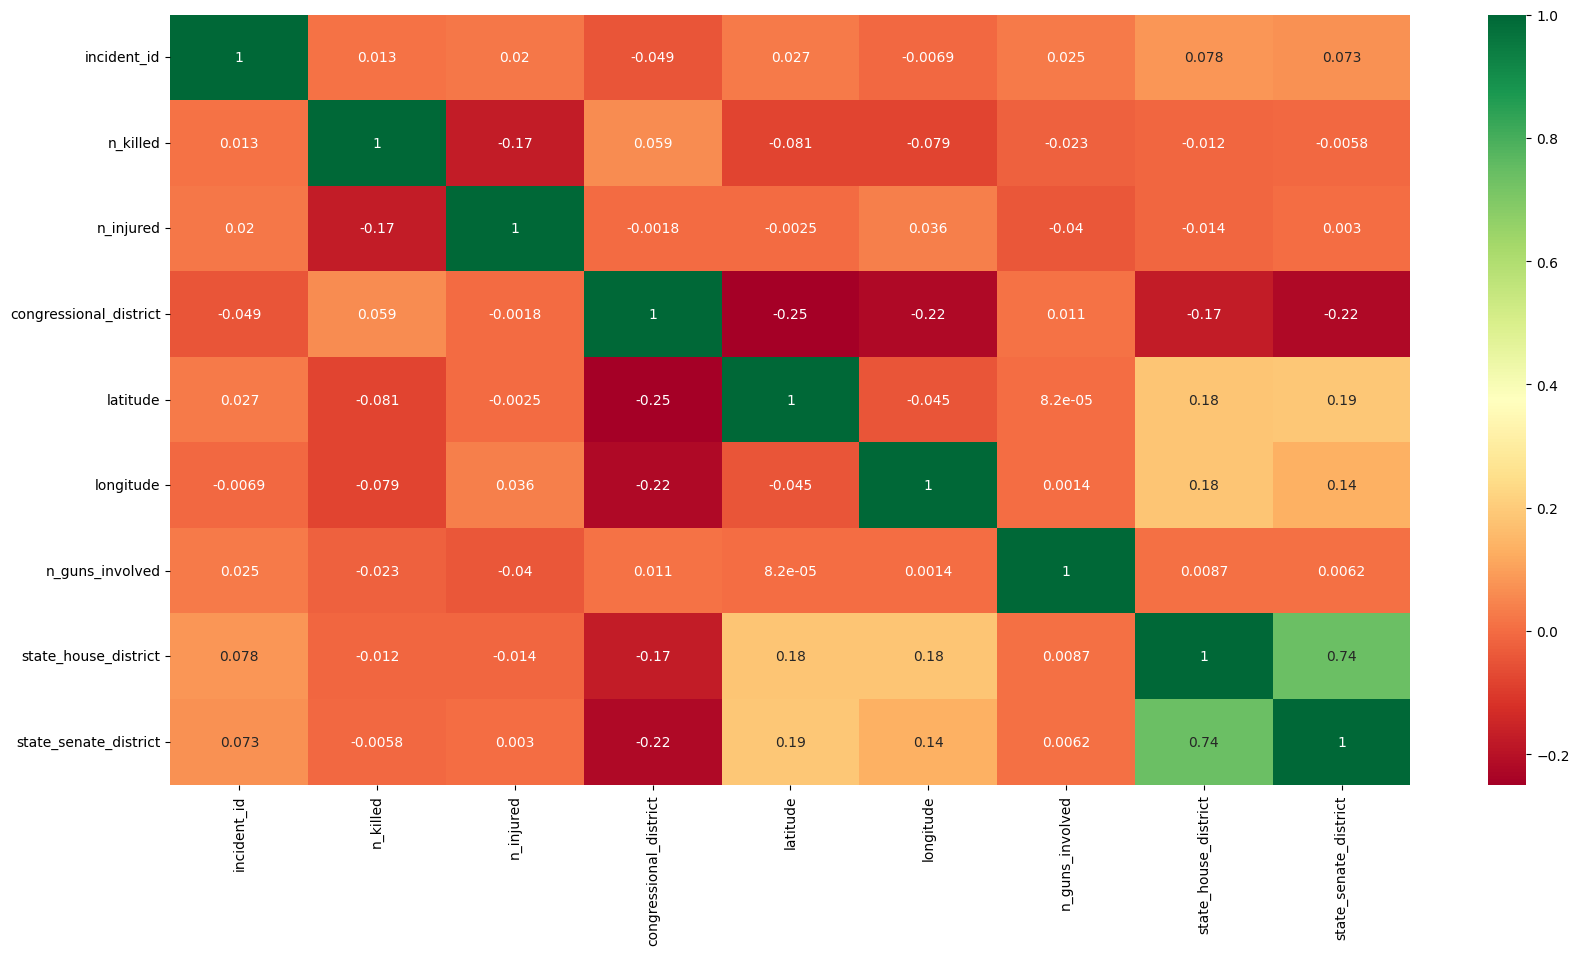

In [331]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', ax=ax)

plt.show()

## b.
I choose a basic model which is probabilistic model that decide the n_injured with the probabilities on our data.
Say that 50% of the n_injured values is 0 and 30% is 1...

than for a new sample the model will decide n_injures is 0 with probability of 50% and n_injures is 1 with probability of 30%.....


Here we can see the count of crimes for each num of injured:


In [332]:
print(df['n_injured'].value_counts())

0     8773
1     5042
2      697
3      172
4       38
5       18
6        4
7        2
19       1
9        1
14       1
10       1
8        1
Name: n_injured, dtype: int64


We can conclude that there is a difference in the percentage of times each number appeared in thetraining set.
The model I suggested is much better than randomly peek a number of injured wich is very simple model.

The function performing it :

In [333]:
def sample_value_with_probability(row):
    value_counts = df['n_injured'].value_counts()
    percentages = (value_counts / len(df)) * 100
    percentages_normalized = percentages / percentages.sum()
    result_df = pd.DataFrame({'Value': percentages.index, 'Percentage': percentages_normalized.values})
    result_df = result_df.sort_values(by='Value').reset_index(drop=True)
    values = result_df['Value'].values
    probabilities = result_df['Percentage'].values
    sampled_value = np.random.choice(values, p=probabilities)
    return sampled_value

df_without_injured  = df.copy()
df_without_injured.drop(columns=['n_injured'], inplace=True)
df_without_injured.drop(columns=['n_killed'], inplace=True)
n_injured_predictions = df_without_injured.apply(sample_value_with_probability, axis=1)
df_without_injured['n_injured'] = n_injured_predictions

To visualize its results,
I choose to do the map in question 2 b over the new data frame with the n_injured values that my model predicted.

We can see that the plot is very similar to the previous plot in question 2 which was on the original df.

In [334]:
injured_density = df_without_injured.groupby(['latitude', 'longitude'])['n_injured'].sum().reset_index(name='injured_count')
m = folium.Map(location=[injured_density['latitude'].mean(), injured_density['longitude'].mean()], zoom_start=4)
heat_data = list(zip(injured_density['latitude'], injured_density['longitude'], np.log10(injured_density['injured_count'] + 1)))
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m)
display(m)

In addition I added the plot like the plot in question 2a that show that the n_injured count increase over time.

As we can see, in the new data frame with the n_injured values that my model predicted there is alsoincrease of n_injured over time and the two plots look very similar.

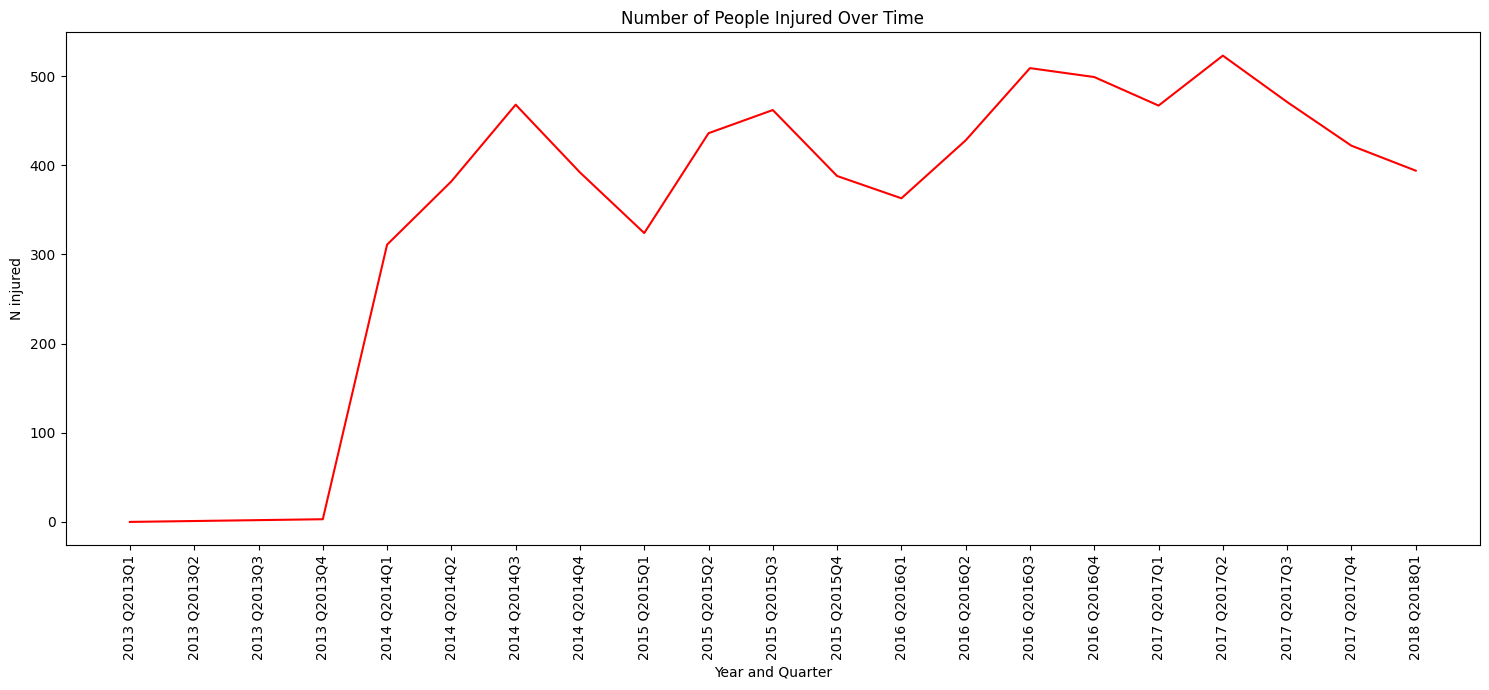

In [335]:
date_df2 = df_without_injured.copy()
date_df2['date'] = pd.to_datetime(date_df2['date'])
date_df2['year'] = date_df2['date'].dt.year
date_df2['q'] = date_df2['date'].dt.to_period("Q")
date_counts2 = date_df2.groupby(['year', 'q']).size().reset_index(name='count')
plt.figure(figsize=(15, 7))

plt.plot(date_df2.groupby(['year', 'q'])['n_injured'].sum().reset_index(name='count')['count'], color='red')
plt.xlabel('Year and Quarter')
plt.ylabel('N injured')
plt.title('Number of People Injured Over Time')
plt.xticks(range(len(date_counts2)), [f"{year} Q{quarter}" for year, quarter in zip(date_counts2['year'], date_counts2['q'])], rotation='vertical')

plt.tight_layout()
plt.show()

# **Question 4**

## a.
The aggregate features I added are:
1. 'state_city_crimes_number' -

 represents the number of crimes that happend in the current state and city.

  It can helps us to know which places are more dangerous and which are less.

2. 'city_or_county_max_casualties' -

  represents the maximum pepole that where hurt in a crime in each city.
  
  It can helps us to know what is the worst crime in each city.
  And in which city there was the hurdest crime.

In [336]:
state_city_counts = df.groupby(['state', 'city_or_county']).size().reset_index(name='state_city_crimes_number')
df = pd.merge(df, state_city_counts, on=['state', 'city_or_county'], how='left')


df['total_casualties'] = df['n_killed'] + df['n_injured']
df['city_or_county_max_casualties'] = df.groupby('city_or_county')['total_casualties'].transform('max')
df


,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district,state_city_crimes_number,total_casualties,city_or_county_max_casualties
0,137007,2016-07-23,Utah,Draper,12300 South,0,1,4.0,0::Unknown,0::Unknown,...,0::Male,0::Eddie Heuser,1::Significant others - current or former,0::Injured,0::Subject-Suspect,87,336,1,1,1
1,49807,2014-12-13,Illinois,Chicago,10400 block of South State Street,1,0,2.0,0::Unknown,0::Unknown,...,0::Male,0::Tyrece L. Stornes,1::Significant others - current or former,0::Killed,0::Victim,102,344,658,1,6
2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,0::Unknown,0::Unknown,...,0::Female||1::Male||2::Female||3::Male,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,64,356,1,4,4
3,237635,2018-03-18,Illinois,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,1.0,0::Unknown,0::Unknown,...,0::Male,0::Officer,1::Significant others - current or former,0::Injured,0::Victim,2652,2638,36,0,3
4,238068,2018-03-21,Michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,0::Handgun,...,0::Male||1::Male||2::Male||3::Male,0::Sylvester Davis III||1::Leonard Robinson||2...,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,106,320,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14746,186845,2017-05-12,Texas,Midland,2700 FM 1379,0,0,11.0,0::Stolen,0::Handgun,...,0::Male||1::Male,0::Officer,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested",0::Subject-Suspect||1::Subject-Suspect,2652,253,3,0,1
14747,234988,2018-03-01,Illinois,Columbus,1500 block of Elaine Rd,1,0,3.0,0::Unknown,0::Unknown,...,0::Male,0::Caleb Zev-Lewis Kekeh,1::Significant others - current or former,0::Killed,0::Victim,105,383,48,1,3
14748,202356,2017-08-07,Florida,Orlando (Pine Hills),5815 North Ln,1,0,10.0,0::Unknown,0::Unknown,...,0::Male||1::Male||2::Male||3::Male,0::Deangelo Henderson||1::Jordan Benjamin||2::...,1::Significant others - current or former,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...",0::Victim||1::Subject-Suspect||2::Subject-Susp...,143,336,2,1,1
14749,2322,2014-01-15,Illinois,Baton Rouge,3400 E Sky Harbor Blvd,0,0,6.0,0::Unknown,0::Unknown,...,0::Female||1::Male||2::Male,1::Cody East||2::Compton East,1::Significant others - current or former,0::Unharmed||1::Unharmed||2::Unharmed,0::Subject-Suspect||1::Subject-Suspect||2::Sub...,107,344,17,0,3


## b.
The information I would add to the data is information about the places where the crimes occured which can help us to see if there is a pattern in a places that have more crimes.

For example, data like the mean income in a place may show that places with a bigger incomes are more common to have crimes in, maby because there are more cases of theft.


## c.
I choose to add a new feature - The mean household income of the specified geographic location, from the online data frame - us-household-income-stats-geo-locations.

In [337]:
df_incomes = pd.read_csv('kaggle_income.csv', encoding='ISO-8859-1')
df_incomes.head(30)

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328
5,1011050,1,Alabama,AL,Cullman County,Cullman,Dodge City,Town,place,35057,256,8913021,26837,34.045414,-86.882670,50715,42643,35886,173.325959
6,1011060,1,Alabama,AL,Escambia County,East Brewton,East Brewton city,City,place,36426,251,8826252,91015,31.091440,-87.055345,33737,23610,28256,758.771322
7,1011070,1,Alabama,AL,Elmore County,Coosada,Elmore,Town,place,36020,334,10222339,176500,32.544337,-86.336446,46319,40242,38941,397.052564
8,1011080,1,Alabama,AL,Morgan County,Eva,Eva,Town,place,35621,256,10544874,78981,34.326504,-86.765318,57994,39591,47235,137.496039
9,1011090,1,Alabama,AL,Talladega County,Sylacauga,Fayetteville,CDP,place,35151,256,45178321,6034534,33.168097,-86.442774,54807,41712,51359,380.728238


In [338]:
state_mean_mapping = df_incomes[['State_Name', 'Mean']].groupby('State_Name').mean().reset_index().rename(columns={'State_Name': 'state', 'Mean': 'mean_incomes'})
state_mean_mapping['state'] = state_mean_mapping['state'].str.lower()
df['state'] = df['state'].str.lower()
df = pd.merge(df, state_mean_mapping, how='left', on='state')
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district,state_city_crimes_number,total_casualties,city_or_county_max_casualties,mean_incomes
0,137007,2016-07-23,utah,Draper,12300 South,0,1,4.0,0::Unknown,0::Unknown,...,0::Eddie Heuser,1::Significant others - current or former,0::Injured,0::Subject-Suspect,87,336,1,1,1,72132.214559
1,49807,2014-12-13,illinois,Chicago,10400 block of South State Street,1,0,2.0,0::Unknown,0::Unknown,...,0::Tyrece L. Stornes,1::Significant others - current or former,0::Killed,0::Victim,102,344,658,1,6,69067.381551
2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,0::Unknown,0::Unknown,...,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,64,356,1,4,4,55715.248366
3,237635,2018-03-18,illinois,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,1.0,0::Unknown,0::Unknown,...,0::Officer,1::Significant others - current or former,0::Injured,0::Victim,2652,2638,36,0,3,69067.381551
4,238068,2018-03-21,michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,0::Handgun,...,0::Sylvester Davis III||1::Leonard Robinson||2...,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,106,320,2,0,0,59001.124361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14746,186845,2017-05-12,texas,Midland,2700 FM 1379,0,0,11.0,0::Stolen,0::Handgun,...,0::Officer,1::Significant others - current or former,"0::Unharmed, Arrested||1::Unharmed, Arrested",0::Subject-Suspect||1::Subject-Suspect,2652,253,3,0,1,65407.010435
14747,234988,2018-03-01,illinois,Columbus,1500 block of Elaine Rd,1,0,3.0,0::Unknown,0::Unknown,...,0::Caleb Zev-Lewis Kekeh,1::Significant others - current or former,0::Killed,0::Victim,105,383,48,1,3,69067.381551
14748,202356,2017-08-07,florida,Orlando (Pine Hills),5815 North Ln,1,0,10.0,0::Unknown,0::Unknown,...,0::Deangelo Henderson||1::Jordan Benjamin||2::...,1::Significant others - current or former,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...",0::Victim||1::Subject-Suspect||2::Subject-Susp...,143,336,2,1,1,60887.889825
14749,2322,2014-01-15,illinois,Baton Rouge,3400 E Sky Harbor Blvd,0,0,6.0,0::Unknown,0::Unknown,...,1::Cody East||2::Compton East,1::Significant others - current or former,0::Unharmed||1::Unharmed||2::Unharmed,0::Subject-Suspect||1::Subject-Suspect||2::Sub...,107,344,17,0,3,69067.381551


In [339]:
pip list --format=freeze > requirements.txt